1. We will have to use 30 different columns and we will have to predict tthe stage of breast cancer M(Malignant) & B(Bengin)

In [43]:
import pandas as pd # Data manipularion, I/O of csv files(csv_read('file.csv'))
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Dope Plot Graphs
import numpy as np # Linear algebra
%matplotlib inline
from sklearn.linear_model import LogisticRegression # For applying Logistic Regression
from sklearn.cross_validation import KFold # Used for cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # To split data into two parts
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # For SupportVectorMachine
from sklearn import metrics

In [9]:
# Import data
data = pd.read_csv('BreastCancer.csv', header=0)

In [12]:
# View the first 7 of the data
data.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [13]:
# Cool alright lets check out data types now 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [14]:
# We'll drop this column using data.drop()
data.drop('Unnamed: 32', axis=1 ,inplace=True )

In [16]:
# Now to check and view our columns you can check all the tables using data.columns
data.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [17]:
# Cool shes dead now lets drop the id also remember use data.drop('column_name', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)

In [18]:
# Do another check with data.columns
data.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [31]:
# Now we can divide the columns up into features slice with [number:number]
features_mean = data.columns[1:11]
features_se = data.columns[11:20]
features_worst = data.columns[21:31]


In [32]:
# Print and each sepretly to double check your result
print(features_mean)
print('____________________________________________________________________________' + '\n')
print(features_se)
print('____________________________________________________________________________' + '\n')
print(features_worst)

Index([u'radius_mean', u'texture_mean', u'perimeter_mean', u'area_mean',
       u'smoothness_mean', u'compactness_mean', u'concavity_mean',
       u'concave points_mean', u'symmetry_mean', u'fractal_dimension_mean'],
      dtype='object')
____________________________________________________________________________

Index([u'radius_se', u'texture_se', u'perimeter_se', u'area_se',
       u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se'],
      dtype='object')
____________________________________________________________________________

Index([u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')


In [33]:
# First lets start with the features_mean
# Since our Diagnosis column is an object we'll need to map it to an interger value
data['diagnosis']=data['diagnosis'].map({'M':1, 'B':0})

In [35]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


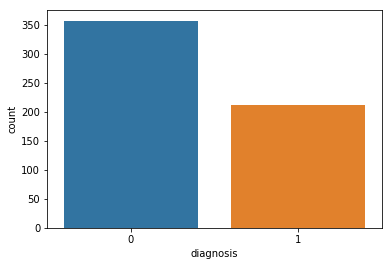

In [36]:
# Lets see the frequency of the cancer stages
sns.countplot(data['diagnosis'], label='Count')

In [37]:
# As you can see the 0(Malignant) is greater then 1(Bengin) which is great new cause it can be cured 

### Data Analysis with the Feature Selection

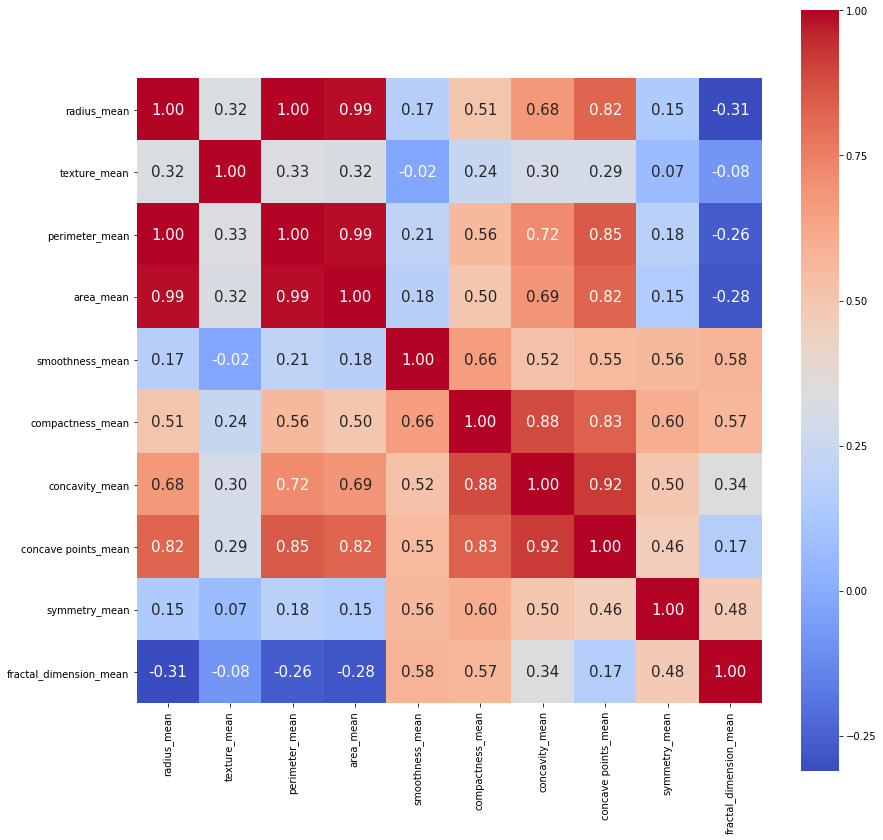

In [40]:
# We will now draw a correlation graph to see all of the multi corelinary features this means there depending on each other
# And we dont need to use the same column twice
# Lets check the corrilation between features and see who does best first will the feature_mean

corr = data[features_mean].corr() # corr is used to find the correlation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, xticklabels=features_mean, yticklabels=features_mean, cmap='coolwarm')

# Observation
    The radius , parameter and area are highly correlated
    Compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
    so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*

In [47]:
# These are the variables which we'll use for prediction
prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']

In [48]:
# Now split our data up to be trained and tested
train, test = train_test_split(data, test_size = 0.3) # Here are data is split into train and test

In [49]:
# Check the dimension with .shape
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [51]:
train_X = train[prediction_var] # Getting training data inputs
train_Y = train.diagnosis # Training data output for data
# Do the same for test
test_X = test[prediction_var]
test_Y = test.diagnosis

In [56]:
model = RandomForestClassifier(n_estimators=100) # A random forest model

In [57]:
model.fit(train_X, train_Y) # Fit the model for training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [59]:
prediction = model.predict(test_X) 
metrics.accuracy_score(prediction,test_Y)

0.93567251461988299

In [63]:
featimp = pd.Series(model.feature_importances_, index = prediction_var).sort_values(ascending=False)
print(featimp)

perimeter_mean      0.470434
compactness_mean    0.232108
texture_mean        0.144083
smoothness_mean     0.093375
symmetry_mean       0.060000
dtype: float64


In [64]:
# Now lets use SVM
model = svm.SVC()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction, test_Y)

0.90058479532163738

In [66]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9064327485380117

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


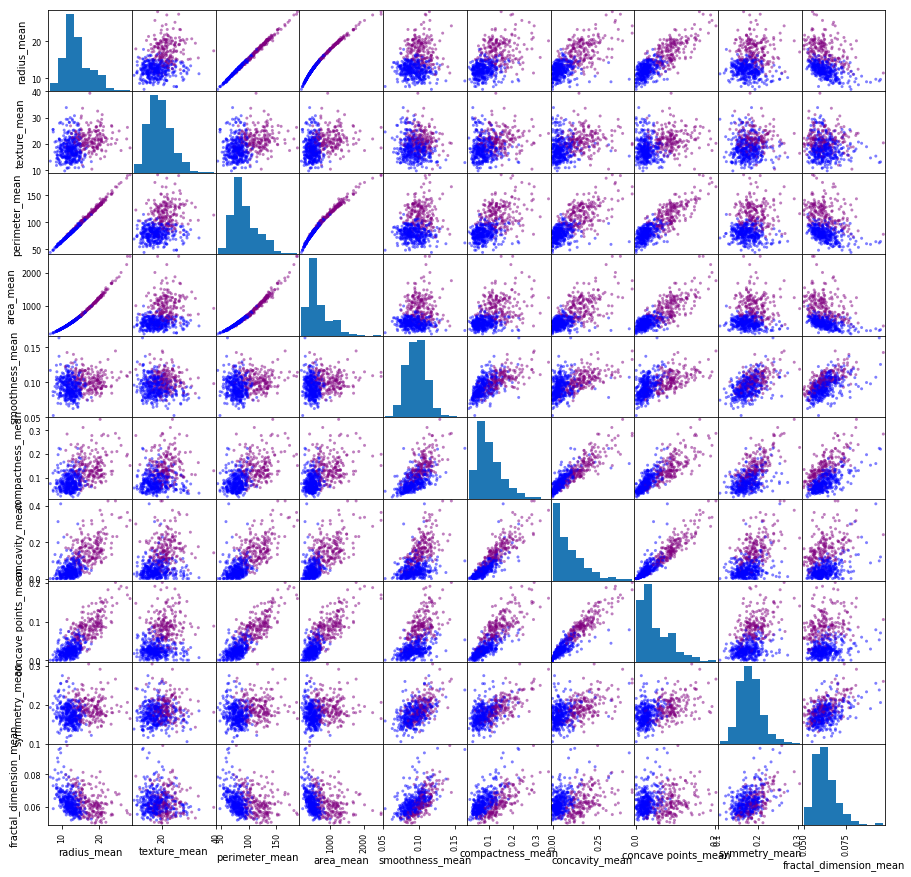

In [74]:
color_function = {0:'blue', 1:'purple'}
color = data['diagnosis'].map(lambda x: color_function.get(x)) # mapping you diagnosis to color
pd.scatter_matrix(data[features_mean], c=color, alpha=0.5, figsize=(15,15));

In [75]:
features_mean

Index([u'radius_mean', u'texture_mean', u'perimeter_mean', u'area_mean',
       u'smoothness_mean', u'compactness_mean', u'concavity_mean',
       u'concave points_mean', u'symmetry_mean', u'fractal_dimension_mean'],
      dtype='object')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no